In [ ]:

# install the newest scikit-learn library

!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import os
import zipfile

# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'rifqinovandi'
os.environ['KAGGLE_KEY'] = '61655b112a6218032cc7743aab07e371'

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 174MB/s]


In [ ]:
files = "/content/stroke-prediction-dataset.zip"
zip = zipfile.ZipFile(files, 'r')
zip.extractall('/content')
zip.close()


In [ ]:

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:

# check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:

# describe numeric column
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: xlabel='stroke'>

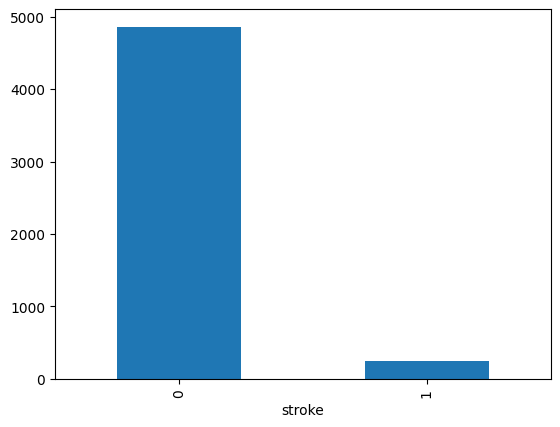

In [ ]:

df['stroke'].value_counts().plot(kind='bar')

In [ ]:
cats = list(df.select_dtypes(include=['object','bool']) )
nums = list(df.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [ ]:

# classify data for the encoding
encoder = []
onehot = []

for col in cats:
   if len(df[col].unique()) == 2:
        encoder.append(col)
   else:
        onehot.append(col)

print(encoder)
print(onehot)


['ever_married', 'Residence_type']
['gender', 'work_type', 'smoking_status']


In [ ]:
df_labencoded = df.copy()

for col in encoder:
    df_labencoded[col] = df_labencoded[col].astype('category').cat.codes
df_labencoded.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [ ]:
df_encoded = pd.get_dummies(df_labencoded)
df_encoded.corr().round(2)

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.00,0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,0.01,-0.00,...,0.01,-0.00,0.01,0.02,-0.02,-0.01,-0.02,0.01,0.01,0.00
age,0.00,1.00,0.28,0.26,0.68,0.01,0.24,0.33,0.25,0.03,...,-0.01,0.13,-0.08,0.12,0.33,-0.63,-0.38,0.24,0.12,0.07
hypertension,0.00,0.28,1.00,0.11,0.16,-0.01,0.17,0.17,0.13,-0.02,...,-0.00,0.02,-0.02,-0.01,0.12,-0.13,-0.14,0.06,0.07,0.03
heart_disease,-0.00,0.26,0.11,1.00,0.11,0.00,0.16,0.04,0.13,-0.09,...,-0.00,0.00,-0.02,0.00,0.09,-0.09,-0.07,0.07,-0.02,0.04
ever_married,0.01,0.68,0.16,0.11,1.00,0.01,0.16,0.34,0.11,0.03,...,-0.02,0.13,-0.09,0.15,0.19,-0.54,-0.33,0.17,0.10,0.11
Residence_type,-0.00,0.01,-0.01,0.00,0.01,1.00,-0.00,-0.00,0.02,0.01,...,-0.01,0.01,0.02,-0.02,0.01,-0.00,-0.00,0.01,-0.02,0.03
avg_glucose_level,0.00,0.24,0.17,0.16,0.16,-0.00,1.00,0.18,0.13,-0.05,...,0.01,0.01,-0.01,0.02,0.06,-0.10,-0.10,0.07,0.02,0.02
bmi,0.00,0.33,0.17,0.04,0.34,-0.00,0.18,1.00,0.04,0.03,...,-0.01,0.08,-0.03,0.21,0.07,-0.45,-0.27,0.11,0.11,0.09
stroke,0.01,0.25,0.13,0.13,0.11,0.02,0.13,0.04,1.00,-0.01,...,-0.00,0.00,-0.01,0.01,0.06,-0.08,-0.06,0.06,-0.00,0.01
gender_Female,-0.00,0.03,-0.02,-0.09,0.03,0.01,-0.05,0.03,-0.01,1.00,...,-0.02,0.02,-0.01,0.03,0.03,-0.09,-0.06,-0.04,0.10,-0.01


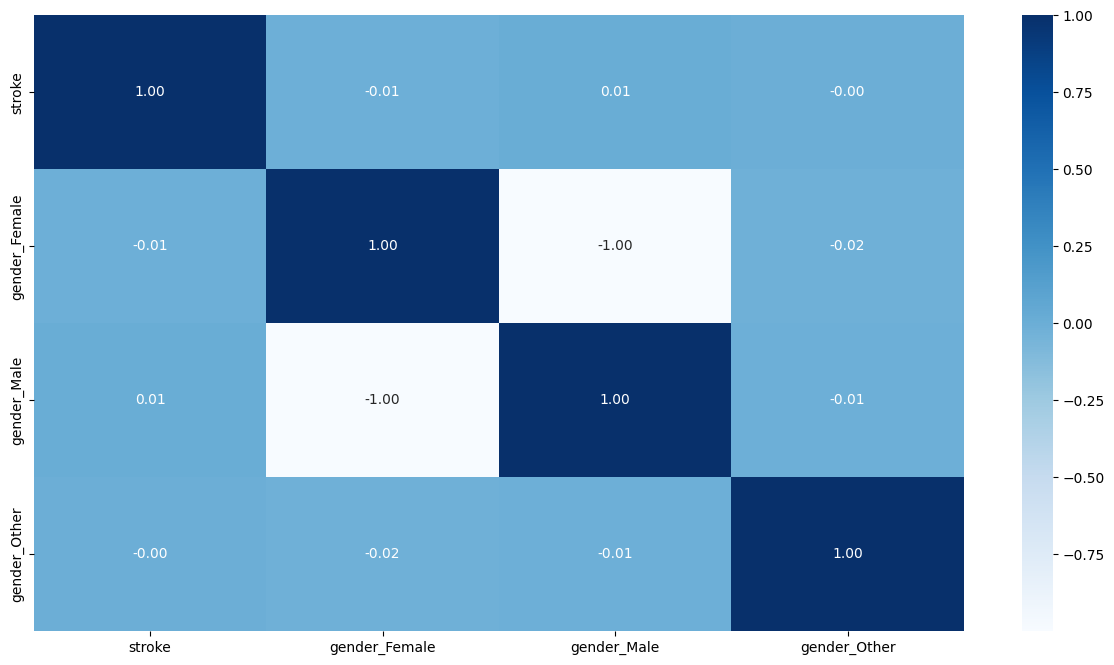

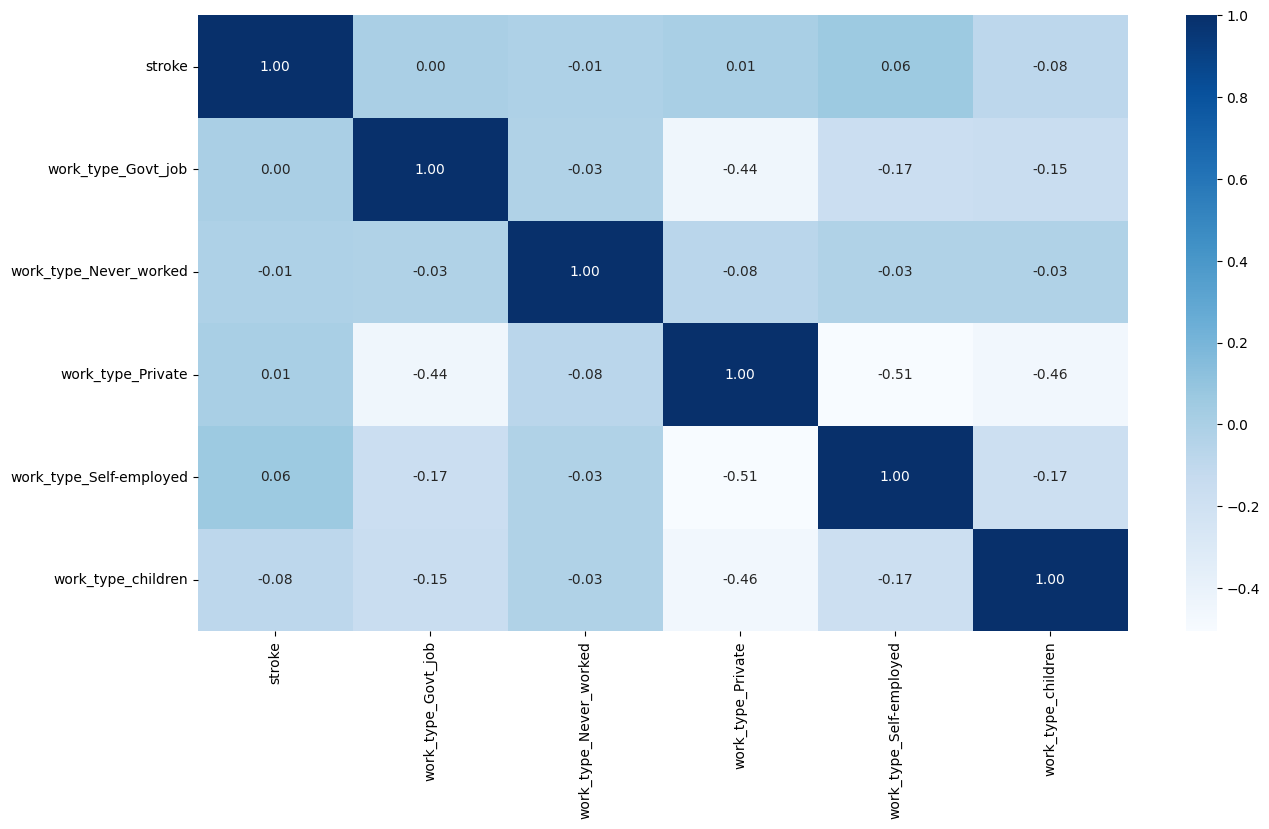

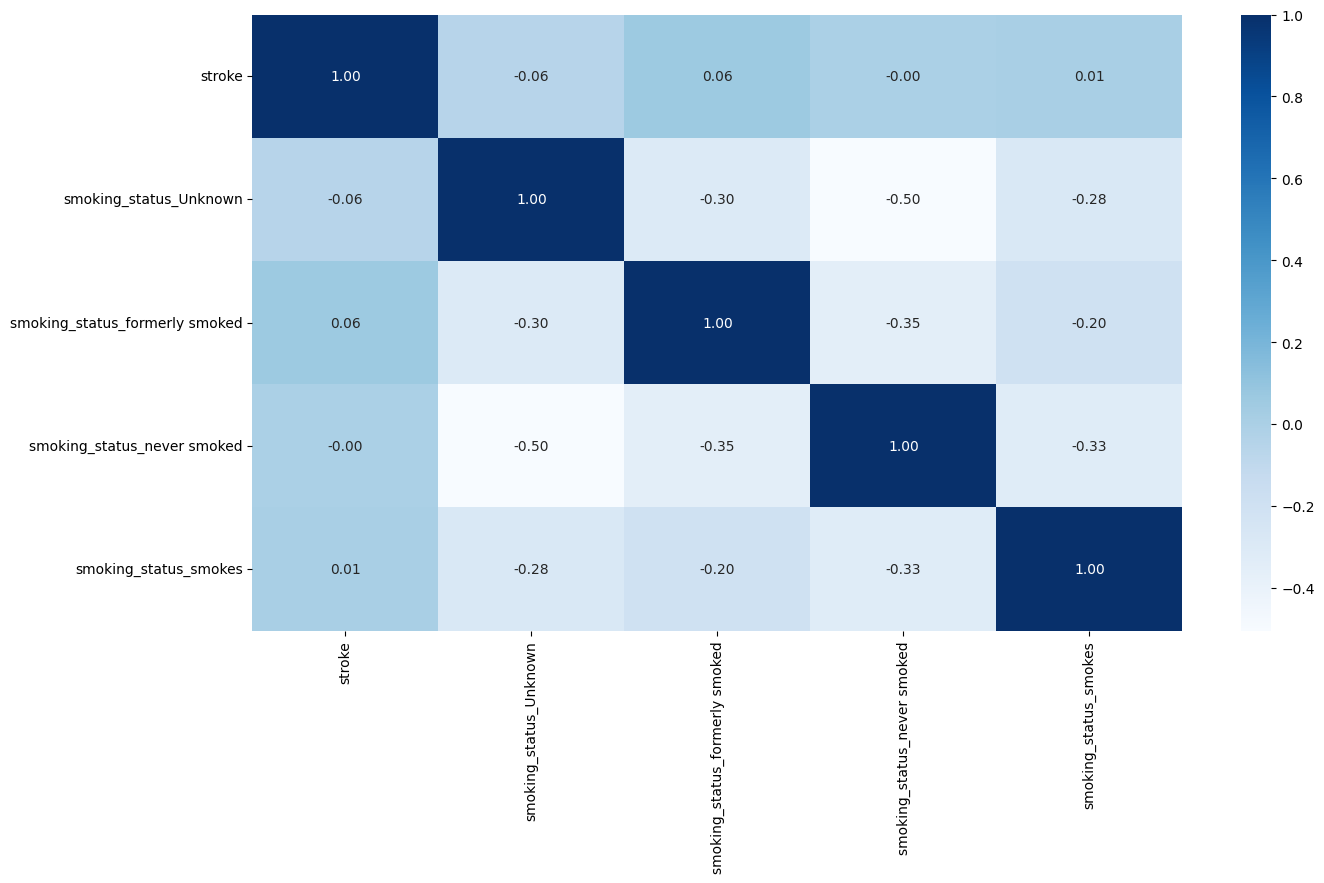

In [ ]:
for col in onehot:
    df_loop = df_labencoded[[col, 'stroke']].copy()
    onehots = pd.get_dummies(df_loop[col], prefix=col)
    df_loop = df_loop.drop(columns=[col])   # drop original string column
    df_loop = df_loop.join(onehots)

    plt.figure(figsize=(15, 8))
    sns.heatmap(df_loop.corr(), cmap='Blues', annot=True, fmt='.2f')
    plt.show()


In [ ]:

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

/tmp/ipython-input-2528276233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [ ]:
df.isna().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
duplicate = df.duplicated()
df[duplicate].sum()


,0
id,0
gender,0
age,0.0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0.0
bmi,0.0


In [ ]:
df = df.drop(['id'], axis=1)
nums.remove('id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


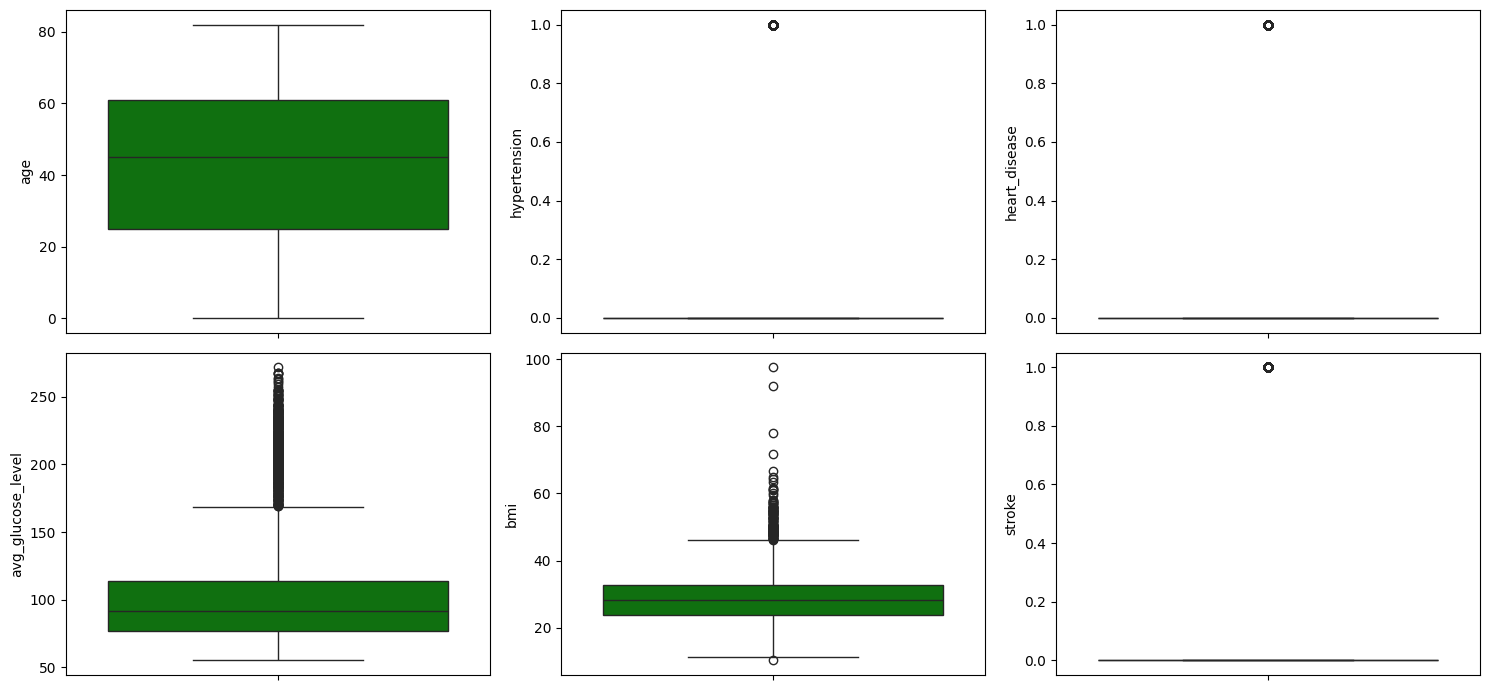

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()


In [ ]:
outlier = ['avg_glucose_level', 'bmi']

In [ ]:

Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:

# onehot encoding for categorical feature
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
6,74.0,1,1,70.09,27.400000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
7,69.0,0,0,94.39,22.800000,1,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
8,59.0,0,0,76.15,28.893237,1,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
9,78.0,0,0,58.57,24.200000,1,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False


In [ ]:
# separate feature and target
X = df.drop(columns = ['stroke'])
y = df['stroke']


In [ ]:

# using SMOTE Techniqe
sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')


Shape of X before SMOTE:(4391, 21)
Shape of X after SMOTE:(8452, 21) 


Target Class distributuion before SMOTE:
stroke
0    0.962423
1    0.037577
Name: proportion, dtype: float64
Target Class distributuion after SMOTE :
stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 111)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((6761, 21), (6761,), (1691, 21), (1691,))

In [ ]:

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


In [ ]:
# Create simple model
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = baseline_model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9763453577764636
Training-set Accuracy score is: 0.9784055613074989


,precision,recall,f1-score,support
No Stroke,0.970803,0.980344,0.975550,814.000000
Stroke,0.981588,0.972634,0.977090,877.000000
accuracy,0.976345,0.976345,0.976345,0.976345
macro avg,0.976195,0.976489,0.976320,1691.000000
weighted avg,0.976396,0.976345,0.976349,1691.000000


<Axes: >

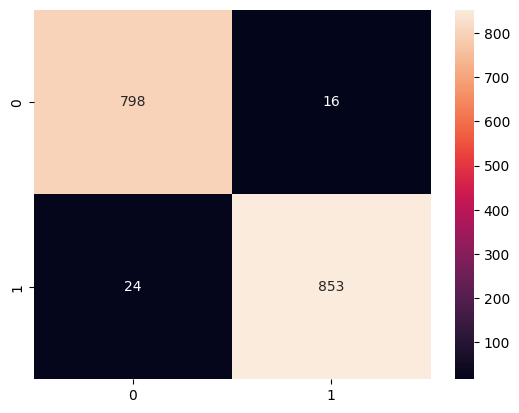

In [ ]:

# Confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)
sns.heatmap(baseline_cf, annot = True, fmt = "d")


In [ ]:
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

new_param = HalvingGridSearchCV(
    estimator=baseline_model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=3, random_state=123, shuffle=True),
    factor=2,                # how much to increase resources each iteration
    max_resources='auto',    # let sklearn decide (usually number of samples)
    scoring='recall',
    aggressive_elimination=False,
    n_jobs=-1                # run in parallel
).fit(X_train, y_train)


In [ ]:


# Result of the hyperparameter tuning
print(f"Best Hyperparameter {new_param.best_estimator_} with score {new_param.best_score_}")

Best Hyperparameter KNeighborsClassifier(algorithm='brute', n_neighbors=2, p=1, weights='distance') with score 0.9670949701180519


In [ ]:
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1, weights='distance')
model.fit(X_train, y_train)

,n_neighbors,1
,weights,'distance'
,algorithm,'ball_tree'
,leaf_size,18
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:

# Test tuned model with test data
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,model.predict(X_train)))

improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

Testing-set Accuracy score is: 0.9692489651094027
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,0.975062,0.960688,0.967822,814.000000
Stroke,0.964004,0.977195,0.970555,877.000000
accuracy,0.969249,0.969249,0.969249,0.969249
macro avg,0.969533,0.968941,0.969188,1691.000000
weighted avg,0.969327,0.969249,0.969239,1691.000000


In [ ]:
metrics = pd.DataFrame({'accuracy' : [baseline_report['accuracy'], improvement_report['accuracy']],
                        'f1-score_0' : [baseline_report['No Stroke']['f1-score'],improvement_report['No Stroke']['f1-score']],
                        'precision_0' : [baseline_report['No Stroke']['precision'],improvement_report['No Stroke']['precision']],
                        'recall_0' : [baseline_report['No Stroke']['recall'],improvement_report['No Stroke']['recall']],
                        'f1-score_1' : [baseline_report['Stroke']['f1-score'],improvement_report['Stroke']['f1-score']],
                        'precision_1' : [baseline_report['Stroke']['precision'],improvement_report['Stroke']['precision']],
                        'recall_1' : [baseline_report['Stroke']['recall'],improvement_report['Stroke']['recall']]},
                        index=['Model Baseline','Tuned Model'])
multiheader = [('','accuracy'),
               ('No Stroke', 'f1-score'),
               ('No Stroke', 'precision'),
               ('No Stroke', 'recall'),
               ('Stroke', 'f1-score'),
               ('Stroke', 'precision'),
               ('Stroke', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
metrics

No Stroke                        Stroke            \
                accuracy  f1-score precision    recall  f1-score precision   
Model Baseline  0.976345  0.975550  0.970803  0.980344  0.977090  0.981588   
Tuned Model     0.969249  0.967822  0.975062  0.960688  0.970555  0.964004   

                          
                  recall  
Model Baseline  0.972634  
Tuned Model     0.977195